# Sorting Algorithms : Hands-On session

Follow the instruction to 

A) Code each sorting algorithm

B) Measure the performances of a given algorithm

C) Present these performances to the class

execute the following line for correct plotting (must be the first cell executed in the worksheet)

(try %matplotlib widget for interactive graph)

In [1]:
%matplotlib inline

Import the required libraries

In [2]:
import random
import numpy as np 
import time

import matplotlib
import matplotlib.pyplot as plt

# Sorting algorithms

## Bubble Sort
The basic idea is to do succesive swaps to bubble up the largest (or smallest) item to the end of the list, then the second largest, then the third largest and so on until no more swaps are needed.


In [3]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
print(unsorted_list)

[0, 2, 9, 4, 6, 8, 5, 7, 3, 1]


In [4]:
def bubble_sort(to_sort: list) -> list:
    """Sort to_sort in place and return it"""
    items = len(to_sort)
    for i in range(items):
        swapped = False
        for j in range(items - i - 1):
            a, b = to_sort[j], to_sort[j + 1]
            if a > b:
                to_sort[j], to_sort[j + 1] = b, a
                swapped = True
        if not swapped:
            return to_sort
    return to_sort

In [5]:
print("You passed the test" if bubble_sort(unsorted_list) == sorted(unsorted_list) else "You failed")

You passed the test


## Insertion Sort
This is a sorting algorithm that sorts one data item at a time. It is rather similar
to how you might sort a hand of cards. The algorithm takes one data item
from the list and places It in the correct location in the list. This process is
repeated until there are no more unsorted data items in the list.

In [6]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
print(unsorted_list)

[4, 5, 7, 9, 8, 1, 0, 2, 6, 3]


In [7]:
def insertion_sort(to_sort: list) -> list:
    """Sort the list, not in place"""
    out = []
    for i in to_sort:
        j = 0
        for j, elem in enumerate(out):
            if elem > i:
                break
        else:
            j += 1
        out.insert(j, i)
    return out

In [8]:
print("You passed the test" if insertion_sort(unsorted_list) == sorted(unsorted_list) else "You failed")

You passed the test


## Merge Sort 
A merge sort can sort a data set extremely quickly using divide and conquer. The principle of divide and
conquer is to create two or more identical sub-problems from the larger problem, solving them individually
and combining their solutions to solve the bigger problem. With the merge sort, the data set is repeatedly
split in half until each item is in its own list. Adjacent lists are then merged back together, with each item in the sub-list being entered into the correct place in the new, combined list.

In [9]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
print(unsorted_list)

[4, 5, 2, 9, 6, 7, 0, 3, 8, 1]


In [10]:
def merge_sort(to_sort: list, start: int = 0, end: int = -1) -> list:
    """Sort the list in-place and return it"""
    if end == -1:
        end = len(to_sort)
    if start == end - 1:
        # 1 element; sublist is sorted
        return
    mid = (end - start) // 2 + start
    # sort the two sublists before combining
    merge_sort(to_sort, start, mid)
    merge_sort(to_sort, mid, end)
    # combine
    pos = start
    # I can't remember the really nice way of doing in-place merge sort;
    # so I'm doing the best I can
    # space complexity increases to O(n) / O(n) total / auxiliary
    # using a reversed list here allows the merge sort to remain O(nlogn)
    # as the pop operation is O(1) compared to pop(0) [O(n)]
    left_copy = to_sort[start:mid]
    left_copy.reverse()
    left_optimise = True
    while left_copy and (mid < end):
        if left_copy[-1] < to_sort[mid]:
            elem = left_copy.pop()
            # if no elements from the right section have been used, don't copy
            # the element over itself
            if not left_optimise:
                to_sort[start] = elem
            start += 1
        else:
            left_optimise = False  # can't optimise the left list anymore
            to_sort[start] = to_sort[mid]
            start += 1
            mid += 1
    # either left_copy is empty and the right side is placed correctly
    # (and the body of this loop will never run), or all the elements from
    # the right side have been used and now the left side must be placed there
    left_copy.reverse()
    for elem in left_copy:
        to_sort[start] = elem
        start += 1
    return to_sort

In [11]:
print("You passed the test" if merge_sort(unsorted_list) == sorted(unsorted_list) else "You failed")

You passed the test


## Quick Sort
Perhaps not unsurprisingly given the name of the algorithm, the quicksort orders a data set extremely quickly
using divide and conquer. The algorithm makes use a of a pivot value from the data set, against which other items are compared to determine their position. It is often considered more efficient than a merge sort due to requiring less memory than a typical recursive merge sort implementation, but this is not really the case. It is usually dependent on the factors affecting the algorithm such as the data set being sorted and the pivot chosen.

In [12]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
print(unsorted_list)

[8, 4, 2, 9, 7, 3, 5, 0, 6, 1]


In [13]:
def partition(to_sort: list, low: int, high: int) -> int:
    pivot = to_sort[high]
    i = low
    for j in range(low, high):
        if to_sort[j] < pivot:
            to_sort[i], to_sort[j] = to_sort[j], to_sort[i]
            i += 1
    to_sort[high], to_sort[i] = to_sort[i], to_sort[high]
    return i


def quick_sort(to_sort: list, low: int = 0, high: int = -1) -> list:
    """Sort to_sort in-place and return it"""
    if high == -1:
        high = len(to_sort) - 1
    if low < high:
        p = partition(to_sort, low, high)
        quick_sort(to_sort, low, p - 1)
        quick_sort(to_sort, p + 1, high)
    return to_sort

In [14]:
print("You passed the test" if quick_sort(unsorted_list) == sorted(unsorted_list) else "You failed")

You passed the test


# Comparing performances 
## Execution time
Measure the execution time of your algorithm for a single execution

In [15]:
import timeit

In [16]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
for alg in (bubble_sort, insertion_sort, merge_sort, quick_sort):
    unsorted_list = unsorted_list.copy()
    print("{}: {}µs".format(alg.__name__, timeit.timeit(alg.__name__ + "(unsorted_list)", number=1, globals=globals()) * 1e6))

bubble_sort: 39.14535045623779µs
insertion_sort: 20.250678062438965µs
merge_sort: 43.645501136779785µs
quick_sort: 54.43394184112549µs


## Average execution time
Measure the execution time averaged over 100 executions

In [17]:
list_len = 10
unsorted_list = random.sample(range(list_len), list_len)
for alg in (bubble_sort, insertion_sort, merge_sort, quick_sort):
    print("{}: {}µs".format(alg.__name__, timeit.timeit(alg.__name__ + "(unsorted_list.copy())", number=100, globals=globals()) * 1e6))

bubble_sort: 3337.070345878601µs
insertion_sort: 1258.2167983055115µs
merge_sort: 3209.538757801056µs
quick_sort: 2230.9422492980957µs


## Execution time as function of n
Measure the average execution time as a function of the size of the list 

In [18]:
sizes = [1, 2, 4, 8, 16, 32, 64] + list(range(100, 600, 100))
performances = [[], [], [], []]
for size in sizes:
    unsorted_list = random.sample(range(size), size)
    for alg, performance in zip((bubble_sort, insertion_sort, merge_sort, quick_sort), performances):
        perf = timeit.timeit(alg.__name__ + "(unsorted_list.copy())", number=1_000, globals=globals()) * 1_000_000
        performance.append(perf)
        print("{} ({}): {}µs".format(alg.__name__, size, perf))

bubble_sort (1): 1948.4832882881165µs
insertion_sort (1): 1738.4514212608337µs
merge_sort (1): 1011.1331939697266µs
quick_sort (1): 641.4726376533508µs
bubble_sort (2): 2354.562282562256µs
insertion_sort (2): 2012.595534324646µs
merge_sort (2): 3395.85542678833µs
quick_sort (2): 5848.042666912079µs
bubble_sort (4): 3677.8524518013µs
insertion_sort (4): 3713.272511959076µs
merge_sort (4): 9291.44024848938µs
quick_sort (4): 6807.483732700348µs
bubble_sort (8): 23081.235587596893µs
insertion_sort (8): 9356.692433357239µs
merge_sort (8): 22243.425250053406µs
quick_sort (8): 22087.126970291138µs
bubble_sort (16): 37417.58316755295µs
insertion_sort (16): 10282.330214977264µs
merge_sort (16): 31107.015907764435µs
quick_sort (16): 18592.633306980133µs
bubble_sort (32): 95884.20391082764µs
insertion_sort (32): 26160.039007663727µs
merge_sort (32): 64662.545919418335µs
quick_sort (32): 159794.9117422104µs
bubble_sort (64): 381917.1413779259µs
insertion_sort (64): 78811.12396717072µs
merge_sort (

## Displaying your results
Plot the average execution time as a function of N

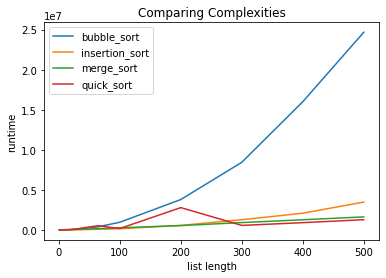

In [19]:
for alg, performance in zip((bubble_sort, insertion_sort, merge_sort, quick_sort), performances):
    plt.plot(sizes, performance, label=alg.__name__)
plt.xlabel("list length")
plt.ylabel("runtime")
plt.title("Comparing Complexities")
plt.legend()

# Annexes: Useful code snippets
## Routine for measuring execution time 

In [20]:
import time 

In [21]:
# store starting time 
begin = time.time() 
  
# program body starts 
for i in range(5): 
    print("CS rocks!") 
# program body ends 

# store end time 

end = time.time()
  
# total time taken 
print(f"Total runtime of the program is {(end - begin) * 1e3}ms") 


CS rocks!
CS rocks!
CS rocks!
CS rocks!
CS rocks!
Total runtime of the program is 0.7417201995849609ms


In [22]:
def time_it(func, *args):
    # store starting time
    #  
    begin = time.time() 
    
    # program body starts 
    func(*args)
    # program body ends 

    # store end time 
    end = time.time()
    
    # total time taken 
    print(f"Total runtime of the program is {(end - begin) * 1e3}ms") 


In [23]:
def print_message(n):
    for i in range(n): 
        print("CS rocks!")

In [24]:
time_it(print_message, 5)

CS rocks!
CS rocks!
CS rocks!
CS rocks!
CS rocks!
Total runtime of the program is 0.4355907440185547ms


## Plotting with matplotlib

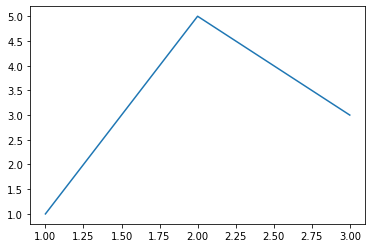

In [25]:
# simple graph
x=[1, 2, 3]
y=[1, 5, 3]
plt.plot(x, y)

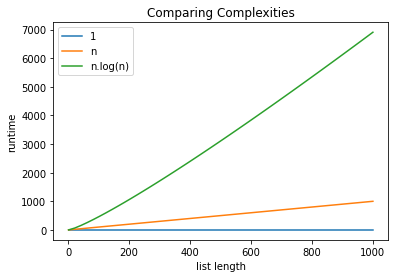

In [26]:
# more complex graph
N = np.linspace(1, 1000)
plt.plot(N, np.ones_like(N), label="1")
plt.plot(N, N, label="n")              
plt.plot(N, N * np.log(N), label = "n.log(n)")    
# plt.plot(N, N * N, label="N²")
plt.xlabel("list length")
plt.ylabel("runtime")
plt.title("Comparing Complexities")
plt.legend()

## Use Numpy arrays 

1D

In [27]:
l = [x for x in range(10)]
print("list:", l, sep="\n")
arr = np.array(l)
print("array:", arr, sep="\n")

list:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
array:
[0 1 2 3 4 5 6 7 8 9]


2D

In [28]:
l = [[x * y for x in range(10)] for y in range(3)]
print("list:", l, sep="\n")
arr = np.array(l)
print("array:", arr, sep="\n")
print(arr[2, 6])

list:
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18]]
array:
[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]]
12


## Using multi-processing

In [29]:
from multiprocessing import Pool

def f(x):
    return x * x

if __name__ == "__main__":
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))

[1, 4, 9]
